### Name: Navyasri Elpula

### Task_4: Stock Market Prediction using Numerical and Textual Analysis
 
This Task is to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

In [39]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR
import scipy.stats as stats

In [40]:
#reading the news headlines dataset
hl=pd.read_csv('india-news-headlines.csv')
hl.head()

C:\Users\Navya9999\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [41]:
hl=hl.drop(columns=['headline_category'])
hl.head()

,publish_date,headline_text
0,20010101,win over cena satisfying but defeating underta...
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa


#### Accumulating the headlines having same dates

In [43]:
dict_news={}

In [78]:
temp = hl.loc[0, 'publish_date']
temp2 = str(hl.loc[0, 'headline_text'])
for x in range(1, len(hl)):
    if hl.loc[x, 'publish_date']==temp:
        temp2 += '. ' + str(hl.loc[x, 'headline_text'])
    else:
        dict_news[hl.loc[x-1, 'publish_date']] = temp2
        temp2 = ""
        temp = hl.loc[x, 'publish_date']

In [79]:
len(dict_news)

5638

In [81]:
indexes = np.arange(0, len(dict_news))

In [82]:
 df=pd.DataFrame(indexes)

In [83]:
df.head()

,0
0,0
1,1
2,2
3,3
4,4


In [84]:
df['publish_date'] = dict_news.keys()

In [85]:
df.head()

,0,publish_date
0,0,20010102
1,1,20010103
2,2,20010104
3,3,20010105
4,4,20010106


In [86]:
l=[]
for i in dict_news.keys():
    l.append(dict_news[i])

In [87]:
df['headline_text']=np.array(l)

In [88]:
df.head()

,0,publish_date,headline_text
0,0,20010102,. Fissures in Hurriyat over Pak visit. America...
1,1,20010103,. Think again; Laxman tells Sangh Parivar. Hur...
2,2,20010104,. Vajpayee gives big push to tech education; R...
3,3,20010105,. Hawkings' day out. Light combat craft takes ...
4,4,20010106,. Hawkings' day out. Ex-GPCC chief against sep...


### Performing Sentiment Analysis on Dataset

In [89]:
polarity = []
subjectivity = []
tuples = []
for i in df['headline_text'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [90]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [92]:
df['Polarity'] = np.array(polarity)
df['Subjectivity'] = np.array(subjectivity)
df.head()

,0,publish_date,headline_text,Polarity,Subjectivity
0,0,20010102,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333
1,1,20010103,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636
2,2,20010104,. Vajpayee gives big push to tech education; R...,0.087961,0.446847
3,3,20010105,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984
4,4,20010106,. Hawkings' day out. Ex-GPCC chief against sep...,0.229545,0.406818


In [93]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df)):
    pol = df.iloc[i]['Polarity']
    sub = df.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [95]:
df['Sentiment'] = polarity
df['Opinion'] = subjectivity
df.head()

,0,publish_date,headline_text,Polarity,Subjectivity,Sentiment,Opinion
0,0,20010102,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
1,1,20010103,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
2,2,20010104,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
3,3,20010105,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public
4,4,20010106,. Hawkings' day out. Ex-GPCC chief against sep...,0.229545,0.406818,Positive,Public


In [117]:
df=df.drop(columns=[0])

In [118]:
len(df)

5638

### Distribution of Sentiments and Opinions

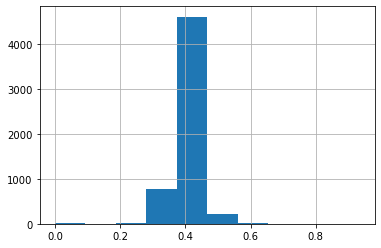

In [119]:
plt.figure(figsize=(6,4))
df['Subjectivity'].hist()
plt.show()

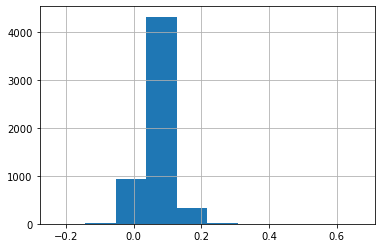

In [120]:
plt.figure(figsize=(6,4))
df['Polarity'].hist()
plt.show()

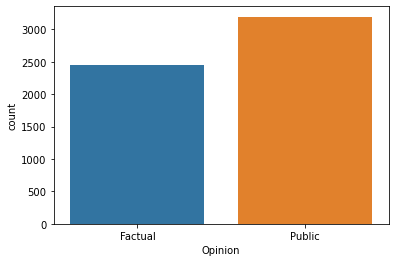

In [121]:
sns.countplot(df['Opinion'])

### Stocks Data: Pre-processing and EDA

In [122]:
stocks = pd.read_csv('Stocks.csv')

In [123]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-21,2984.75,3007.50,2983.75,3006.50,3006.50,886557.0
1,2019-10-22,3006.50,3014.25,2988.25,2994.50,2994.50,1125601.0
2,2019-10-23,2992.00,3006.00,2982.00,3005.75,3005.75,1055958.0
3,2019-10-24,3006.00,3015.25,2998.75,3004.25,3004.25,1061278.0
4,2019-10-25,3003.75,3026.50,3000.00,3020.25,3020.25,1098391.0


In [124]:
len(stocks)

306

In [125]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       306 non-null    object 
 1   Open       296 non-null    float64
 2   High       296 non-null    float64
 3   Low        296 non-null    float64
 4   Close      296 non-null    float64
 5   Adj Close  296 non-null    float64
 6   Volume     296 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.9+ KB


In [126]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,296.000000,296.000000,296.000000,296.000000,296.000000,2.960000e+02
mean,3113.608953,3144.930811,3083.089527,3117.374189,3117.374189,1.768106e+06
std,261.917335,243.856126,275.008727,258.650445,258.650445,9.503463e+05
min,2220.250000,2229.000000,2174.000000,2203.250000,2203.250000,1.958570e+05
25%,2992.750000,3026.375000,2975.625000,3005.375000,3005.375000,1.228364e+06
50%,3146.375000,3179.375000,3128.750000,3151.000000,3151.000000,1.569313e+06
75%,3305.062500,3324.000000,3287.687500,3303.312500,3303.312500,2.078889e+06
max,3578.750000,3587.000000,3526.250000,3579.250000,3579.250000,6.659472e+06


In [127]:
stocks['HL_pct']=((stocks['High']-stocks['Low'])/stocks['Low'])*100
stocks['PCT_change']=((stocks['Close']-stocks['Open'])/stocks['Open'])*100

In [128]:
stocks = stocks.drop(['Open','High','Close','Low'], axis=1)

In [129]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-21,3006.50,886557.0,0.795978,0.728704
1,2019-10-22,2994.50,1125601.0,0.870074,-0.399135
2,2019-10-23,3005.75,1055958.0,0.804829,0.459559
3,2019-10-24,3004.25,1061278.0,0.550229,-0.058217
4,2019-10-25,3020.25,1098391.0,0.883333,0.549313


In [130]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-21,3006.50,886557.0,0.795978,0.728704
1,2019-10-22,2994.50,1125601.0,0.870074,-0.399135
2,2019-10-23,3005.75,1055958.0,0.804829,0.459559
3,2019-10-24,3004.25,1061278.0,0.550229,-0.058217
4,2019-10-25,3020.25,1098391.0,0.883333,0.549313


In [131]:
df.columns = ['Date', 'Headline', 'Polarity', 'Subjectivity', 'Sentiment', 'Opinion']

In [181]:
df['Date'] = pd.to_datetime(stocks['Date'])
df.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
0,2019-10-21,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
1,2019-10-22,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
2,2019-10-23,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
3,2019-10-24,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public
4,2019-10-25,. Hawkings' day out. Ex-GPCC chief against sep...,0.229545,0.406818,Positive,Public


### Merging the News and Stocks Datasets on the basis of Dates

In [182]:
merge_data = df.merge(stocks,how='inner',on='Date',left_index=True)

In [183]:
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-21,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual,3006.50,886557.0,0.795978,0.728704
1,2019-10-22,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual,2994.50,1125601.0,0.870074,-0.399135
2,2019-10-23,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public,3005.75,1055958.0,0.804829,0.459559
3,2019-10-24,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public,3004.25,1061278.0,0.550229,-0.058217
4,2019-10-25,. Hawkings' day out. Ex-GPCC chief against sep...,0.229545,0.406818,Positive,Public,3020.25,1098391.0,0.883333,0.549313


In [184]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          306 non-null    datetime64[ns]
 1   Headline      306 non-null    object        
 2   Polarity      306 non-null    float64       
 3   Subjectivity  306 non-null    float64       
 4   Sentiment     306 non-null    object        
 5   Opinion       306 non-null    object        
 6   Adj Close     296 non-null    float64       
 7   Volume        296 non-null    float64       
 8   HL_pct        296 non-null    float64       
 9   PCT_change    296 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 26.3+ KB


In [185]:
merge_data = merge_data.drop(0)

In [186]:
merge_data = merge_data[merge_data['Adj Close'].notna()]

In [187]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 1 to 305
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          295 non-null    datetime64[ns]
 1   Headline      295 non-null    object        
 2   Polarity      295 non-null    float64       
 3   Subjectivity  295 non-null    float64       
 4   Sentiment     295 non-null    object        
 5   Opinion       295 non-null    object        
 6   Adj Close     295 non-null    float64       
 7   Volume        295 non-null    float64       
 8   HL_pct        295 non-null    float64       
 9   PCT_change    295 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 25.4+ KB


In [188]:
merge_data = merge_data.reset_index()
merge_data.head()

,index,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,1,2019-10-22,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual,2994.50,1125601.0,0.870074,-0.399135
1,2,2019-10-23,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public,3005.75,1055958.0,0.804829,0.459559
2,3,2019-10-24,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public,3004.25,1061278.0,0.550229,-0.058217
3,4,2019-10-25,. Hawkings' day out. Ex-GPCC chief against sep...,0.229545,0.406818,Positive,Public,3020.25,1098391.0,0.883333,0.549313
4,5,2019-10-27,. Bajrang Dal blows hot; cold. Vajpayee reject...,-0.060708,0.365356,Neutral,Factual,3024.25,855745.0,0.107518,0.041350


In [190]:
merge_data = merge_data.drop(['index'], axis=1)
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-22,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual,2994.50,1125601.0,0.870074,-0.399135
1,2019-10-23,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public,3005.75,1055958.0,0.804829,0.459559
2,2019-10-24,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public,3004.25,1061278.0,0.550229,-0.058217
3,2019-10-25,. Hawkings' day out. Ex-GPCC chief against sep...,0.229545,0.406818,Positive,Public,3020.25,1098391.0,0.883333,0.549313
4,2019-10-27,. Bajrang Dal blows hot; cold. Vajpayee reject...,-0.060708,0.365356,Neutral,Factual,3024.25,855745.0,0.107518,0.041350


### Considering only required columns of the merged Dataset

In [191]:
df_needed = merge_data[['Date', 'Polarity', 'Subjectivity','Adj Close','HL_pct','PCT_change']]
df_needed.head()

,Date,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,2019-10-22,0.163636,0.363636,2994.50,0.870074,-0.399135
1,2019-10-23,0.087961,0.446847,3005.75,0.804829,0.459559
2,2019-10-24,0.260401,0.473984,3004.25,0.550229,-0.058217
3,2019-10-25,0.229545,0.406818,3020.25,0.883333,0.549313
4,2019-10-27,-0.060708,0.365356,3024.25,0.107518,0.041350


In [192]:
df_needed = df_needed.set_index('Date')

In [193]:
df_needed.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2019-10-22,0.163636,0.363636,2994.50,0.870074,-0.399135
2019-10-23,0.087961,0.446847,3005.75,0.804829,0.459559
2019-10-24,0.260401,0.473984,3004.25,0.550229,-0.058217
2019-10-25,0.229545,0.406818,3020.25,0.883333,0.549313
2019-10-27,-0.060708,0.365356,3024.25,0.107518,0.041350


### Scaling the data using MinMaxScaler to develop a model based on it.

In [195]:
scaler = MinMaxScaler()
new = pd.DataFrame(scaler.fit_transform(df_needed))
new.columns = df_needed.columns
new.index=df_needed.index
new.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2019-10-22,0.441077,0.389610,0.575036,0.058595,0.453282
2019-10-23,0.356994,0.478765,0.583212,0.053760,0.494577
2019-10-24,0.548594,0.507840,0.582122,0.034890,0.469677
2019-10-25,0.514310,0.435877,0.593750,0.059578,0.498893
2019-10-27,0.191805,0.391453,0.596657,0.002079,0.474465


In [196]:
trainSet = new[: int(0.7*(len(new)))]
testSet = new[int(0.7*(len(new))):]

In [197]:
model = VAR(endog = trainSet)
fit = model.fit()

C:\Users\Navya9999\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


### Predicted vs Test Set

In [198]:
pred = fit.forecast(fit.y, steps=len(testSet))
predicted = pd.DataFrame(pred, columns=new.columns)

C:\Users\Navya9999\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [199]:
predicted.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
0,0.320740,0.417577,0.601794,0.151806,0.455736
1,0.336132,0.396068,0.606212,0.161168,0.486592
2,0.334255,0.400141,0.605439,0.162145,0.478128
3,0.334935,0.398300,0.605851,0.164057,0.480225
4,0.334705,0.398235,0.605795,0.164944,0.479476


In [200]:
testSet.head()

,Polarity,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,,
2020-06-30,0.332814,0.420795,0.644622,0.167763,0.542339
2020-07-01,0.300642,0.423949,0.653888,0.127203,0.500144
2020-07-02,0.313736,0.463983,0.672783,0.140160,0.514726
2020-07-05,0.322063,0.385547,0.676599,0.039309,0.492506
2020-07-06,0.329591,0.416288,0.704033,0.158172,0.544415


In [201]:
np.sqrt(mean_squared_error(predicted['Adj Close'], testSet['Adj Close']))

0.23247599700168683

C:\Users\Navya9999\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


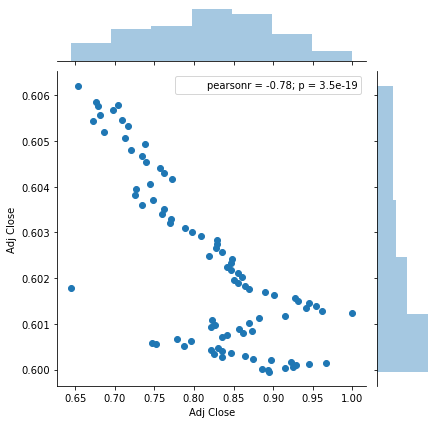

In [202]:
sns.jointplot(testSet['Adj Close'], predicted['Adj Close']).annotate(stats.pearsonr)
plt.show()